# EDA

기록한 고객일지 데이터를 통해 마곡역금융센터 LG출장소 지점의 특성을 살펴본다. 

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MultiLabelBinarizer

from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cur_path = Path('.').resolve()
data_path = cur_path / "data"

In [3]:
plt.rc('font', family='Malgun Gothic')

## 데이터 불러오기, 전처리

In [4]:
journals_df = pd.read_csv(data_path / "journals.csv")

journals_df.drop("Name", axis=1, inplace=True)
journals_df.loc[:, "Date"] = pd.to_datetime(journals_df.loc[:, "Date"], format="%B %d, %Y")


In [5]:
journals_df.loc[:, "work_id"] = journals_df.index

In [6]:
journals_df.head()

,Date,Tags,work_id
0,2021-09-16,신권,0
1,2021-09-16,"OTP, 신권",1
2,2021-09-16,"계좌신규, 정부지원금, 체크카드",2
3,2021-09-16,OTP,3
4,2021-09-17,신권,4


In [7]:
journals_df.loc[:, "Tags"] = journals_df.loc[:, "Tags"].apply(lambda x: x.split(","))
journals_df.loc[:, "Tags"] = journals_df.loc[:, "Tags"].apply(lambda x: [i.strip() for i in x])

journals_df_original = journals_df.copy()
journals_df = journals_df.explode("Tags", ignore_index=True)

In [8]:
journals_df.head()

,Date,Tags,work_id
0,2021-09-16,신권,0
1,2021-09-16,OTP,1
2,2021-09-16,신권,1
3,2021-09-16,계좌신규,2
4,2021-09-16,정부지원금,2


## 데이터 분석

### 기본 통계량

In [9]:
work_count = journals_df.work_id.iloc[-1] 

In [10]:
work_days = len(set(journals_df["Date"]))

In [11]:
works_per_day = work_count / work_days

In [12]:
tags_count = len(set(journals_df["Tags"]))

In [13]:
tags_per_work = journals_df.groupby("work_id").count()["Tags"].mean()

In [14]:
print(f"""
총 업무 수: {work_count}
총 업무일: {work_days}

일평균 업무 수: {works_per_day}

총 태그 수: {tags_count}
업무당 편균 태그 수: {tags_per_work}

""")


총 업무 수: 451
총 업무일: 60

일평균 업무 수: 7.516666666666667

총 태그 수: 50
업무당 편균 태그 수: 1.6946902654867257




In [22]:
top_tags = journals_df.groupby("Tags")["work_id"].count()
top_tags.sort_values(ascending=False).head(10)

Tags
OTP     61
대리인     49
신용대출    48
이체      47
입금      40
지급      36
청약      36
계좌해지    34
대출상담    34
irp     34
Name: work_id, dtype: int64

### 데이터 시각화

#### daily count

<AxesSubplot:xlabel='Date'>

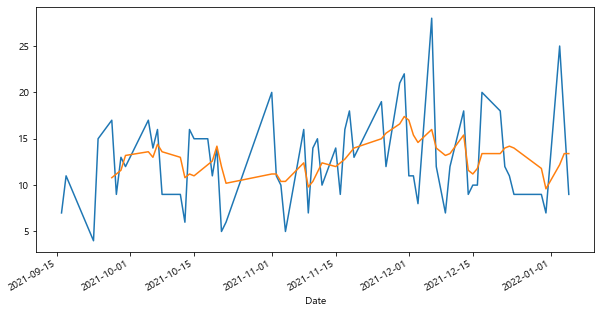

In [15]:
plt.figure(figsize=(10, 5))
count = journals_df.groupby("Date")["work_id"].count()
count_ma = count.rolling(5).mean()

count.plot()
count_ma.plot()

#### tag별 count

<AxesSubplot:xlabel='count', ylabel='Tags'>

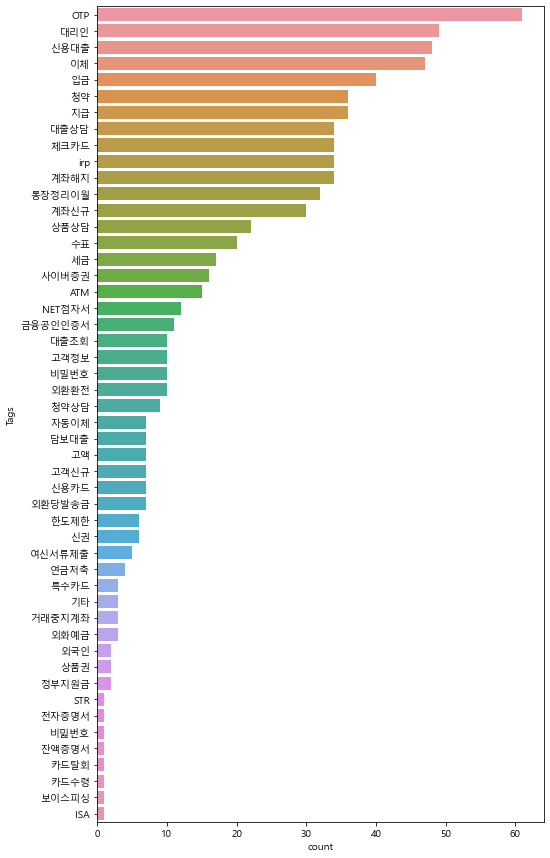

In [16]:
value_count_index = journals_df["Tags"].value_counts().index

plt.figure(figsize=(8, 15))
sns.countplot(y="Tags", data=journals_df, order=value_count_index)

### IRP 의 시간적 변화

Text(0.5, 1.0, '월별 IRP 업무 수')

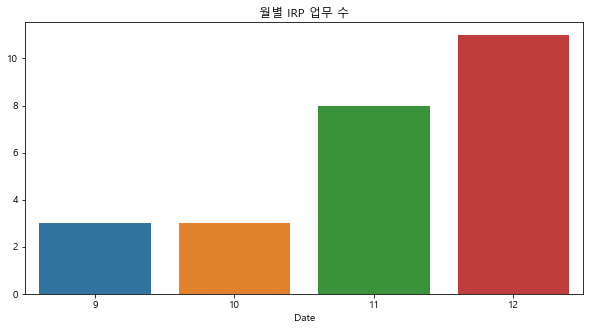

In [39]:
irps = journals_df[journals_df.Tags == "irp"]
irps = irps.groupby("Date")["work_id"].count()
irps = irps.groupby(by=irps.index.month).count()

plt.figure(figsize=(10, 5))
sns.barplot(x=irps.index, y=irps.values).set_title("월별 IRP 업무 수")

#### 업무 단위 tag별 상관관계

In [139]:
worktag_list = list(journals_df_original["Tags"])

mlb = MultiLabelBinarizer()
tags_onehot_df =  pd.DataFrame(mlb.fit_transform(worktag_list), columns=mlb.classes_)
tags_onehot_df

,ATM,ISA,NET점자서,OTP,STR,irp,거래중지계좌,계좌신규,계좌해지,고객신규,...,정부지원금,지급,청약,청약상담,체크카드,카드수령,카드탈회,통장정리이월,특수카드,한도제한
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

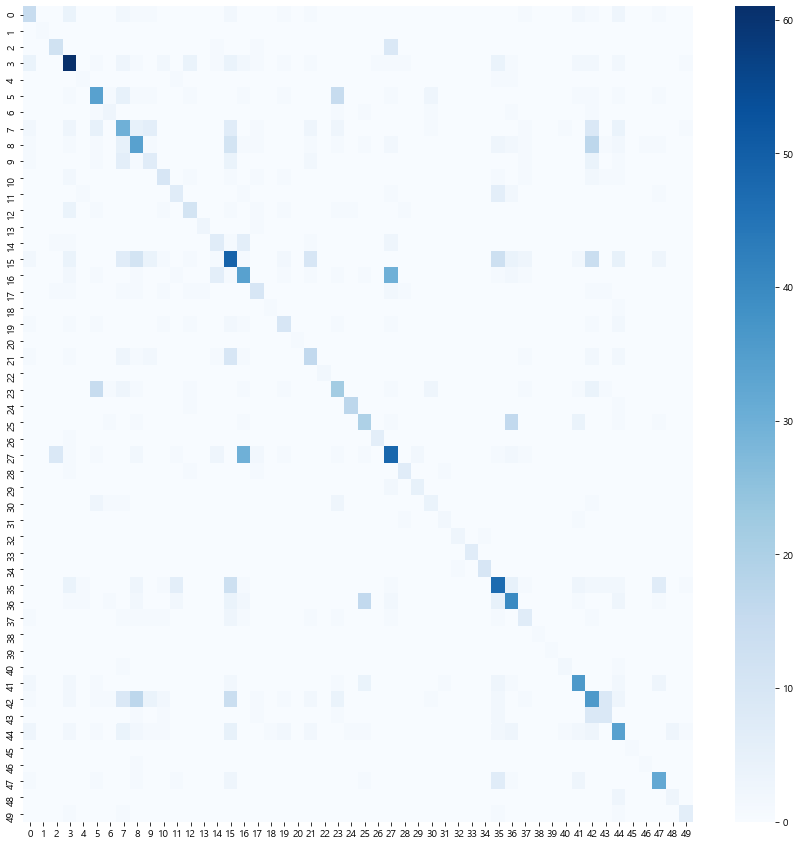

In [143]:
plt.figure(figsize=(15, 15))
sns.heatmap(np.dot(tags_onehot_df.T, tags_onehot_df), cmap="Blues")